In [59]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set_context('talk', font_scale=1.4)
sns.set(rc={'figure.figsize': (25, 15)})

red = pd.read_csv('winequality/winequality-red.csv', sep=";")
white = pd.read_csv('winequality/winequality-white.csv', sep=";")

# concat two data sets
red['type'] = 'red'
white['type'] = 'white'
all_wine = pd.concat([red, white], ignore_index=True)

all_wine['quality_label'] = all_wine['quality'].apply(
    lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high'
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
display(all_wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label'],
      dtype='object')

In [61]:
display(all_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium


In [62]:
# make a copy of our original data set, so the manipulations would not affect it
x = all_wine.copy(deep=True)

# leave only fields that are not correlated with each other for the training
X = x[[
    'residual sugar',
    'chlorides',
    'total sulfur dioxide',
    'pH',
    'sulphates',
    'alcohol'
]]

# what field are we trying to predict?
y = all_wine['quality_label']

print(X.shape)
print(y.shape)

(6497, 6)
(6497,)


In [69]:
from sklearn.metrics import classification_report

# split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=4)

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train, y_train)                     # 3. fit model to data
y_model = model.predict(X_test)                 # 4. predict on new data

print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        42
         low       0.59      0.48      0.53       487
      medium       0.67      0.79      0.73       771

    accuracy                           0.65      1300
   macro avg       0.42      0.42      0.42      1300
weighted avg       0.62      0.65      0.63      1300



/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

In [64]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train_norm, y_train)                     # 3. fit model to data
y_model = model.predict(X_test_norm)                 # 4. predict on new data
print(accuracy_score(y_test, y_model))

0.666923076923077


In [65]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

# apply standardization on numerical features
for i in X_train.columns:
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train_stand, y_train)                     # 3. fit model to data
y_model = model.predict(X_test_stand)                 # 4. predict on new data
print(accuracy_score(y_test, y_model))

0.6746153846153846


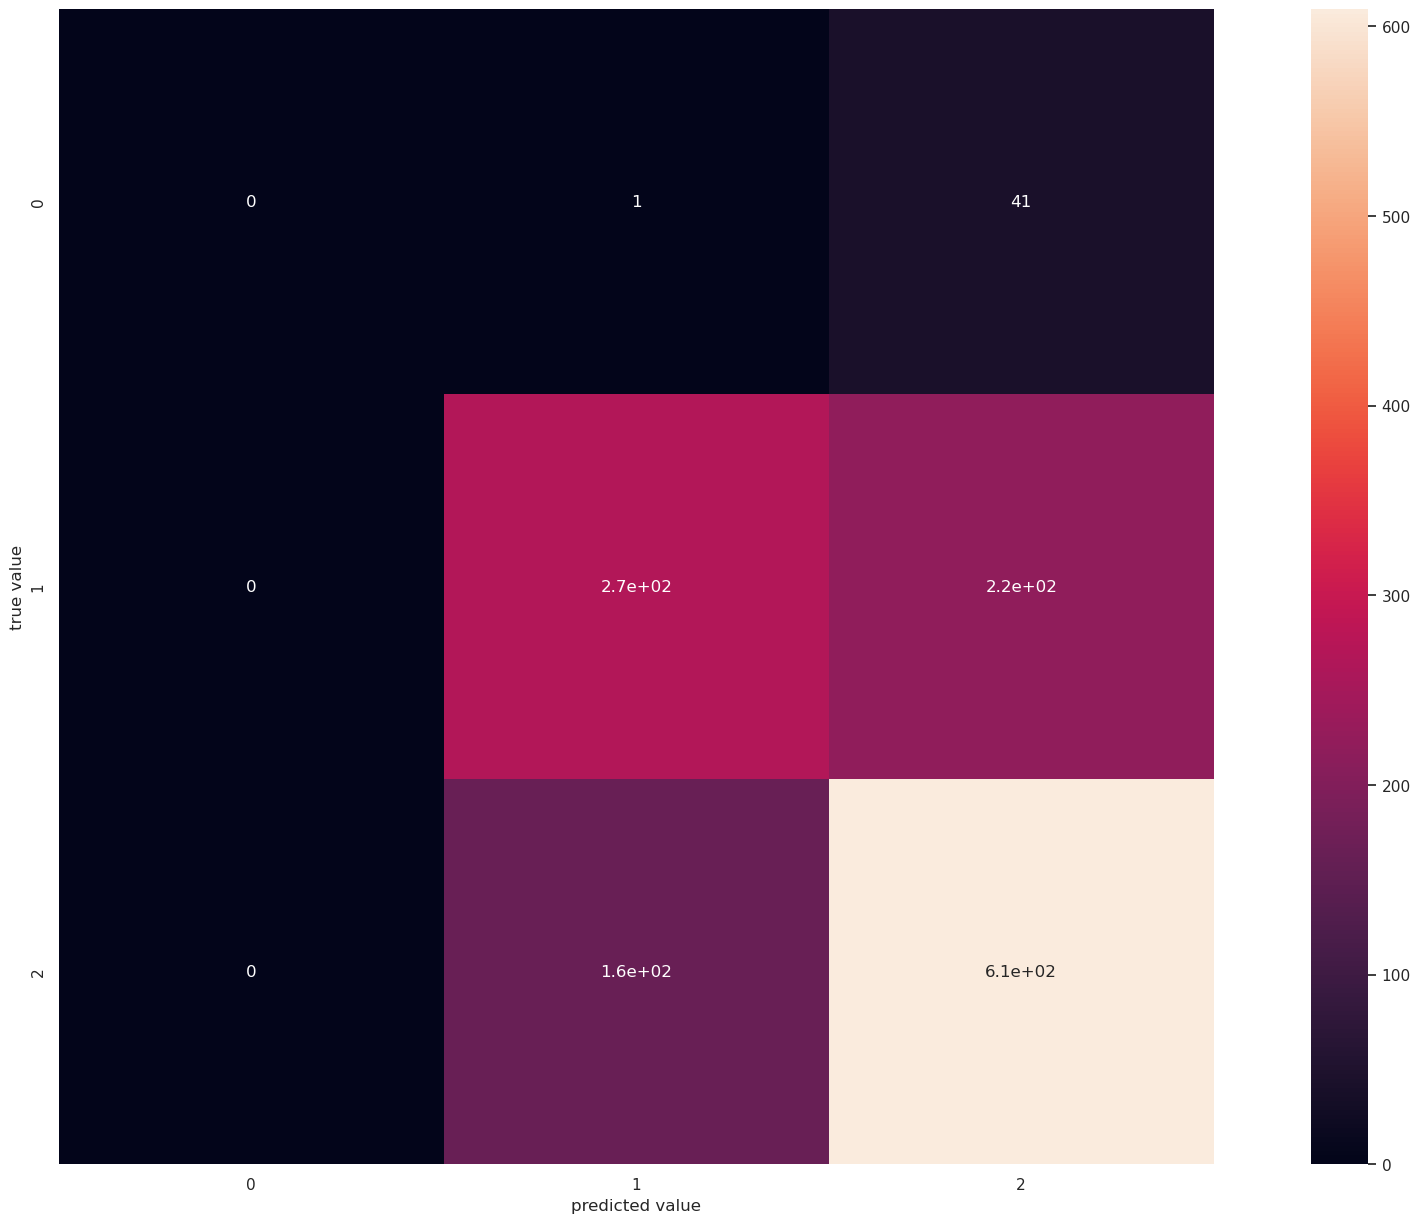

In [66]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');